# Estudi de dades de OpenMP

A tindre a en compte
- Es necesari tindre les llibreries matplotlib i pandas per executar aquest document
- Els fitxers csv son del format, columna es tamany de matriu, i les files donen els temps
- Els comentaris fan referencia a les dades extretes amb el meu ordinador. Els temps d'execucio podrian variar molt si s'executes en un altre.

In [90]:
# Llibrerias necesaries
import pandas as pd
import matplotlib.pyplot as plt

## Suma de matrius

### Sequencial

Resultat

In [91]:
dfss = pd.read_csv('csv/sumaSequencial.csv')
dfss

,100x100,200x200,400x400,800x800,1000x1000,2000x2000,5000x5000,10000x10000,
0,0.000072,0.000194,0.000783,0.012503,0.089430,0.155367,0.254412,0.799990,
1,0.000052,0.000334,0.000984,0.080004,0.161611,0.173215,0.260041,0.582243,
2,0.000060,0.000195,0.000753,0.003545,0.070402,0.160367,0.295928,0.773935,
3,0.009213,0.000220,0.000797,0.002749,0.004913,0.196356,0.356416,0.734628,
4,0.008505,0.000269,0.000747,0.003035,0.017761,0.166372,0.339276,1.271250,
5,0.000048,0.000560,0.013165,0.071306,0.056156,0.181604,0.307117,0.651354,
6,0.000089,0.000231,0.001048,0.058155,0.088583,0.197206,0.505071,1.137669,
7,0.000214,0.000199,0.000976,0.103507,0.004490,0.157840,0.378697,1.380849,
8,0.000051,0.000192,0.000741,0.073065,0.057887,0.247412,0.262530,0.842136,
9,0.000092,0.000307,0.000872,0.009503,0.093497,0.171356,0.393717,0.641466,


A partir de ara no mostrare els csv pero si mostrare les seves grafiques.

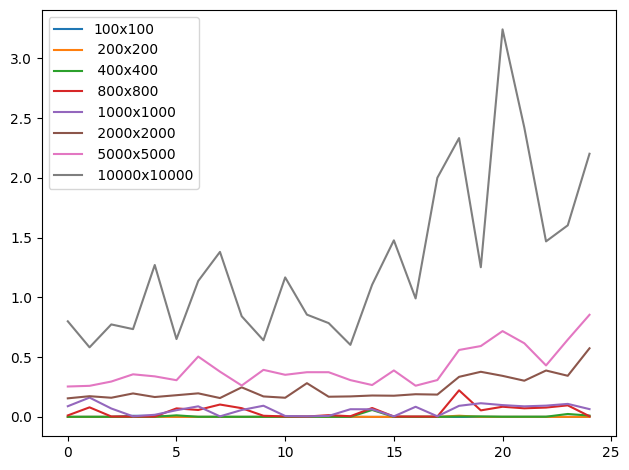

In [92]:
dfss.plot();

#### Mitjanes

<Axes: >

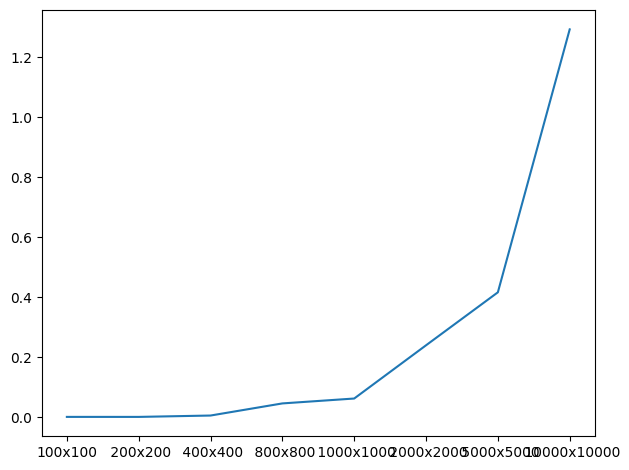

In [93]:
dfss.mean(numeric_only=True).plot()

Es pot veure com el temps de execucio augmenta rapidament.

### Paralelisme 1
Ara ho comparare amb una primera utilitzacio de paralelisme.

<Axes: >

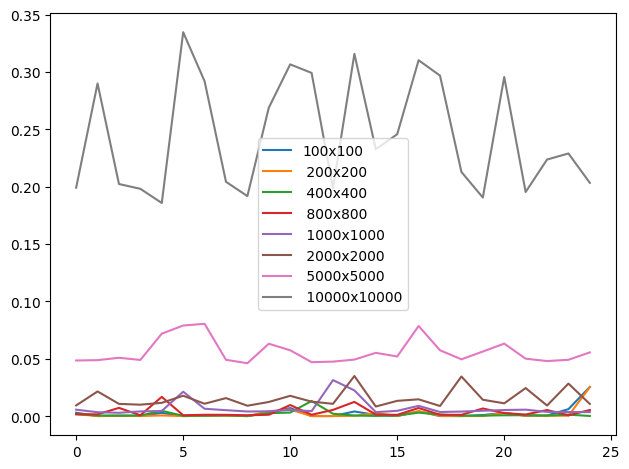

In [94]:
# Data frame suma paralel
dfsp = pd.read_csv('csv/sumaParalel.csv')
dfsp.plot()

#### Comparant les mitjanes amb la suma sequencial

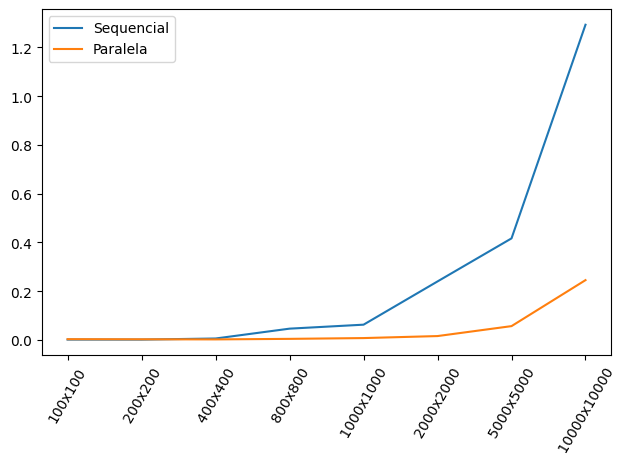

In [104]:
ax=dfss.mean(numeric_only=True).plot(label='Sequencial')
dfsp.mean(numeric_only=True).plot(ax=ax, label='Paralela')
plt.xticks(rotation=60)
plt.legend()
plt.show()